In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(train_set,valid_set),dataset_info=tfds.load('malaria',split=['train[:65%]','train[65%:]'],with_info=True,as_supervised=True)

In [6]:
num_classes=dataset_info.features['label'].num_classes
num_training_examples=0
num_validation_examples=0
for i in train_set:
  num_training_examples+=1
for i in valid_set:
  num_validation_examples+=1

print('The number of training examples: {}'.format(num_training_examples) )
print('The number of validation examples: {}'.format(num_validation_examples) )

The number of training examples: 17913
The number of validation examples: 9645


In [0]:
def resize_image(image,label):
  image=tf.image.resize(image,(100,100))/255.
  return image,label  

train_batches=train_set.shuffle(num_training_examples//4).map(resize_image).batch(32).prefetch(1)
valid_batches=valid_set.map(resize_image).batch(32).prefetch(1)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),padding='same', activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D((2, 2),strides=2),
   

    tf.keras.layers.Conv2D(64, (3,3), padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2),strides=2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2),strides=2),
    tf.keras.layers.Dropout(0.5),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
epochs=30
history = model.fit(
    train_batches,
    
    epochs=epochs,
    validation_data=valid_batches,
)

Epoch 1/30
560/560 [==============================] - 20s 36ms/step - loss: 0.4549 - accuracy: 0.7741 - val_loss: 0.2191 - val_accuracy: 0.9002
Epoch 2/30
560/560 [==============================] - 20s 35ms/step - loss: 0.1940 - accuracy: 0.9326 - val_loss: 0.1644 - val_accuracy: 0.9452
Epoch 3/30
560/560 [==============================] - 20s 35ms/step - loss: 0.1629 - accuracy: 0.9480 - val_loss: 0.1511 - val_accuracy: 0.9499
Epoch 4/30
560/560 [==============================] - 20s 35ms/step - loss: 0.1492 - accuracy: 0.9532 - val_loss: 0.1635 - val_accuracy: 0.9503
Epoch 5/30
560/560 [==============================] - 20s 36ms/step - loss: 0.1453 - accuracy: 0.9549 - val_loss: 0.1438 - val_accuracy: 0.9562
Epoch 6/30
560/560 [==============================] - 20s 36ms/step - loss: 0.1376 - accuracy: 0.9560 - val_loss: 0.1409 - val_accuracy: 0.9561
Epoch 7/30
560/560 [==============================] - 20s 35ms/step - loss: 0.1349 - accuracy: 0.9571 - val_loss: 0.1365 - val_accuracy:

In [27]:
final_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print('The obtained training accuracy is: {}{} '.format(round(final_acc*100,2),'%'))
print('The otained validation accuracy is : {}{}'.format(round(final_val_acc*100,2),'%'))

The obtained training accuracy is: 96.39% 
The otained validation accuracy is : 95.7%


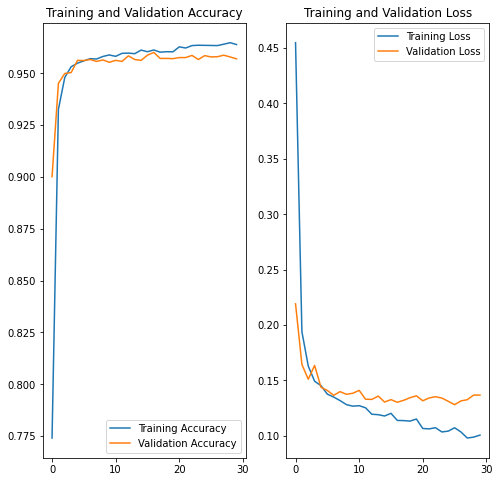

In [28]:
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
class_names = np.array(dataset_info.features['label'].names)
print(class_names)

['parasitized' 'uninfected']


In [30]:
image_batch, label_batch = next(iter(train_batches))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
print(predicted_class_names)

['parasitized' 'parasitized' 'uninfected' 'parasitized' 'uninfected'
 'uninfected' 'uninfected' 'parasitized' 'uninfected' 'parasitized'
 'uninfected' 'uninfected' 'parasitized' 'parasitized' 'parasitized'
 'parasitized' 'uninfected' 'parasitized' 'uninfected' 'parasitized'
 'parasitized' 'uninfected' 'uninfected' 'parasitized' 'uninfected'
 'uninfected' 'uninfected' 'parasitized' 'uninfected' 'parasitized'
 'uninfected' 'uninfected']


In [31]:
print("Labels: ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:  [0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1]
Predicted labels:  [0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1]


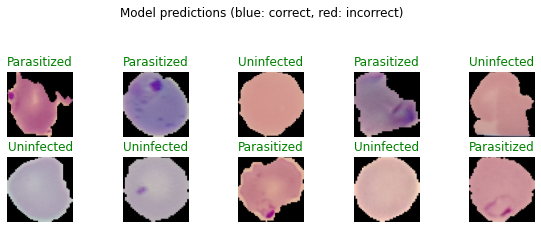

In [35]:
plt.figure(figsize=(10,9))
for n in range(10):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "green" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")